In [1]:
import pandas as pd
import numpy as np

data_intermedio = {
    'Fecha': ['2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-04', 
              '2023-01-05', '2023-01-06', '2023-02-01', '2023-02-02', '2023-02-03', 
              '2023-02-04', '2023-02-05', '2023-02-05', '2023-02-06', np.nan],
    'Producto': ['Camiseta', 'Pantalón', 'Pantalón', 'Zapatos', 'Camiseta', 
                 'Pantalón', 'Zapatos', 'Camiseta', 'Pantalón', 'Zapatos', 
                 'Camiseta', 'Pantalón', 'Pantalón', 'Zapatos', 'Camiseta'],
    'Categoría': ['Ropa', 'Ropa', 'Ropa', 'Calzado', 'Ropa', 
                  'Ropa', 'Calzado', 'Ropa', 'Ropa', 'Calzado', 
                  'Ropa', 'Ropa', 'Ropa', 'Calzado', 'Ropa'],
    'Precio': [25, 50, 50, 75, 25, 50, 75, 25, 50, 75, 25, 50, 50, 75, 25],
    'Cantidad': [1, 2, 2, 1, 3, 1, 2, 4, 1, 2, 3, 2, 2, 1, 3],
    'Ventas Totales': [25, 100, 100, 75, 75, 50, 150, 100, 50, 150, 75, 100, 100, 75, 75]
}

df_intermedio = pd.DataFrame(data_intermedio)
df_intermedio

,Fecha,Producto,Categoría,Precio,Cantidad,Ventas Totales
0,2023-01-01,Camiseta,Ropa,25,1,25
1,2023-01-02,Pantalón,Ropa,50,2,100
2,2023-01-02,Pantalón,Ropa,50,2,100
3,2023-01-03,Zapatos,Calzado,75,1,75
4,2023-01-04,Camiseta,Ropa,25,3,75
5,2023-01-05,Pantalón,Ropa,50,1,50
6,2023-01-06,Zapatos,Calzado,75,2,150
7,2023-02-01,Camiseta,Ropa,25,4,100
8,2023-02-02,Pantalón,Ropa,50,1,50
9,2023-02-03,Zapatos,Calzado,75,2,150


In [2]:
df_intermedio = df_intermedio.dropna()
df_intermedio = df_intermedio.drop_duplicates()

In [3]:
df_intermedio['Fecha'] = pd.to_datetime(df_intermedio['Fecha'])

In [4]:
# Crear columna 'Mes' con el nombre del mes
df_intermedio['Mes'] = df_intermedio['Fecha'].dt.month_name()

# Crear columna 'Día de la semana' con el nombre del día
df_intermedio['Día de la semana'] = df_intermedio['Fecha'].dt.day_name()

In [5]:
df_intermedio

,Fecha,Producto,Categoría,Precio,Cantidad,Ventas Totales,Mes,Día de la semana
0,2023-01-01,Camiseta,Ropa,25,1,25,January,Sunday
1,2023-01-02,Pantalón,Ropa,50,2,100,January,Monday
3,2023-01-03,Zapatos,Calzado,75,1,75,January,Tuesday
4,2023-01-04,Camiseta,Ropa,25,3,75,January,Wednesday
5,2023-01-05,Pantalón,Ropa,50,1,50,January,Thursday
6,2023-01-06,Zapatos,Calzado,75,2,150,January,Friday
7,2023-02-01,Camiseta,Ropa,25,4,100,February,Wednesday
8,2023-02-02,Pantalón,Ropa,50,1,50,February,Thursday
9,2023-02-03,Zapatos,Calzado,75,2,150,February,Friday
10,2023-02-04,Camiseta,Ropa,25,3,75,February,Saturday


In [6]:
# Agrupar por 'Categoría' y 'Mes', y calcular la suma de 'Ventas Totales' y 'Cantidad'
ventas_por_categoria_mes = df_intermedio.groupby(['Categoría', 'Mes']).agg({
    'Ventas Totales': 'sum',
    'Cantidad': 'sum'
}).reset_index()

# Mostrar el resultado
print(ventas_por_categoria_mes)


  Categoría       Mes  Ventas Totales  Cantidad
0   Calzado  February             225         3
1   Calzado   January             225         3
2      Ropa  February             325        10
3      Ropa   January             250         7


In [7]:
# Agrupar por 'Día de la semana' y calcular la venta promedio
ventas_promedio_dia = df_intermedio.groupby('Día de la semana')['Ventas Totales'].mean().reset_index()

# Para ordenar los días de la semana en orden natural
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_promedio_dia['Día de la semana'] = pd.Categorical(ventas_promedio_dia['Día de la semana'], categories=dias_orden, ordered=True)

# Ordenar el DataFrame según los días de la semana
ventas_promedio_dia = ventas_promedio_dia.sort_values('Día de la semana')

# Mostrar resultados
print(ventas_promedio_dia)


  Día de la semana  Ventas Totales
1           Monday            87.5
5          Tuesday            75.0
6        Wednesday            87.5
4         Thursday            50.0
0           Friday           150.0
2         Saturday            75.0
3           Sunday            62.5


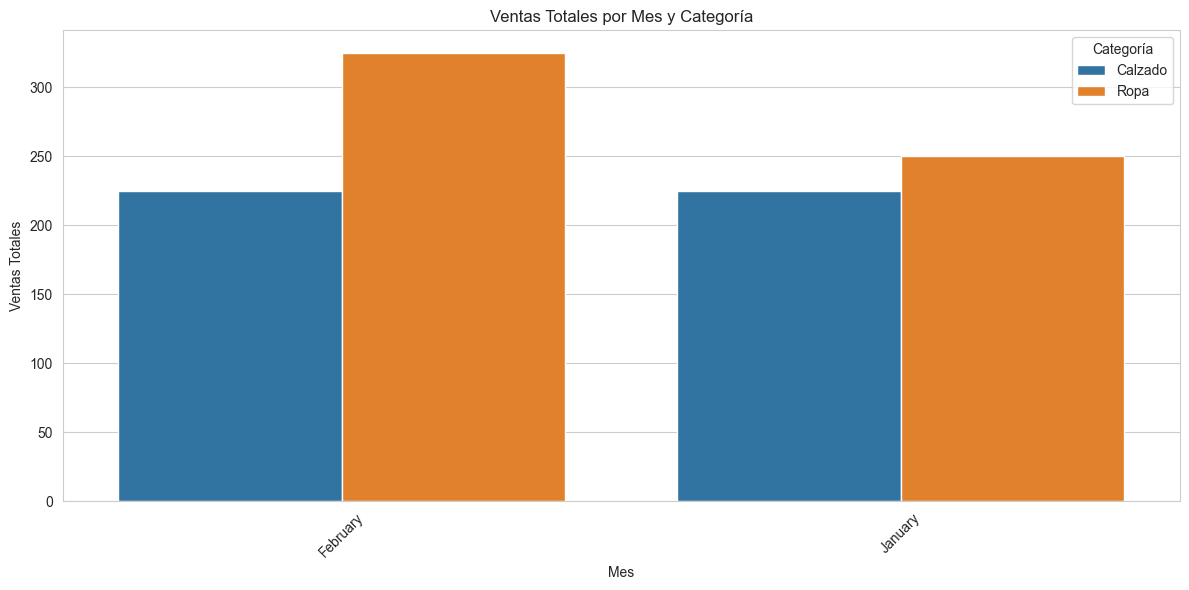

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar tamaño del gráfico y estilo
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras agrupadas usando seaborn
sns.barplot(
    data=ventas_por_categoria_mes, 
    x='Mes', 
    y='Ventas Totales', 
    hue='Categoría'
)

# Personalizar el gráfico
plt.title('Ventas Totales por Mes y Categoría')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12752\1499384998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


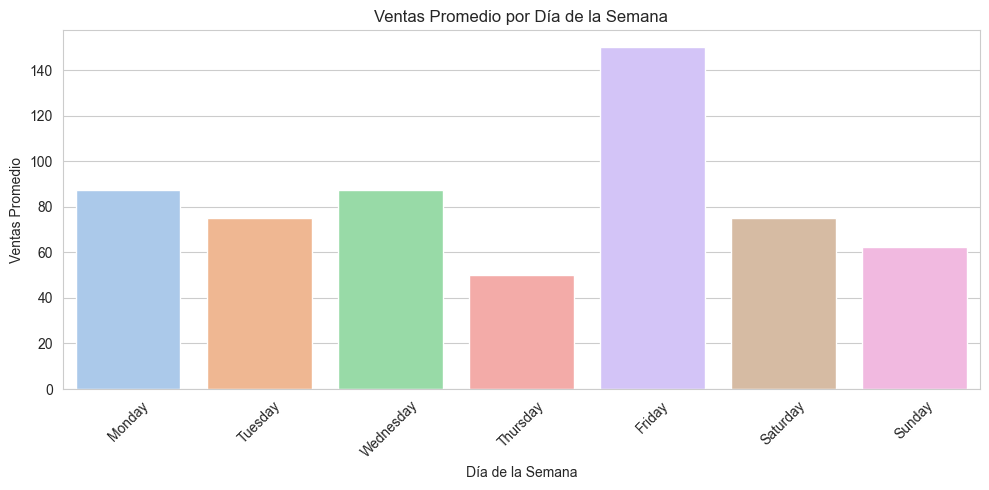

In [9]:
# Configurar tamaño y estilo del gráfico
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Crear gráfico de barras para ventas promedio por día de la semana
sns.barplot(
    data=ventas_promedio_dia, 
    x='Día de la semana', 
    y='Ventas Totales',
    palette='pastel'
)

# Personalizar el gráfico
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [10]:
# Agrupar por categoría y calcular estadísticas
estadisticas_categoria = df_intermedio.groupby('Categoría')['Ventas Totales'].agg(['mean', 'median', 'std']).reset_index()

# Renombrar columnas para mejor lectura
estadisticas_categoria.columns = ['Categoría', 'Promedio Ventas', 'Mediana Ventas', 'Desviación Estándar Ventas']

# Mostrar resultados
print(estadisticas_categoria)


  Categoría  Promedio Ventas  Mediana Ventas  Desviación Estándar Ventas
0   Calzado          112.500           112.5                   43.301270
1      Ropa           71.875            75.0                   28.149791
